# ETL

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.\
            appName('workshop').\
            master('local[*]').\
            config('spark.sql.repl.eagerEval.enabled', True).\
            config('spark.jars', '../libs/postgresql-42.2.8.jar').\
            getOrCreate()

In [2]:
from credentials import USERNAME, PASSWORD, HOST, PORT, DATABASE, TABLE

df = spark.read.format('jdbc'). \
    option('url', f'jdbc:postgresql://{HOST}:{PORT}/{DATABASE}'). \
    option('dbtable', TABLE). \
    option('user', USERNAME). \
    option('password', PASSWORD). \
    option('driver', 'org.postgresql.Driver'). \
    option('numPartitions', 128). \
    option('partitionColumn', 'price'). \
    option('lowerBound', 0). \
    option('upperBound', 500). \
    option("fetchsize", 10000). \
    load()

df

insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
2019-08-16 03:35:45,VALENCIA,MADRID,2019-08-18 14:10:00,2019-08-18 15:48:00,AVE,null,Turista,Adulto ida
2019-08-16 03:35:45,VALENCIA,MADRID,2019-08-18 15:10:00,2019-08-18 17:03:00,AVE,null,TuristaSólo plaza H,Flexible
2019-08-16 03:35:45,VALENCIA,MADRID,2019-08-18 20:15:00,2019-08-18 21:55:00,AVE,null,TuristaSólo plaza H,Flexible
2019-08-16 03:35:45,VALENCIA,MADRID,2019-08-18 22:00:00,2019-08-18 23:47:00,AVE,null,null,null
2019-08-16 03:36:14,VALENCIA,MADRID,2019-09-02 06:20:00,2019-09-02 10:36:00,INTERCITY,null,Turista,Adulto ida
2019-08-16 03:36:18,VALENCIA,MADRID,2019-09-01 09:50:00,2019-09-01 16:58:00,REGIONAL,null,Turista,Promo
2019-08-16 03:36:18,VALENCIA,MADRID,2019-09-01 19:15:00,2019-09-01 21:01:00,AVE,null,Turista,Flexible
2019-08-16 03:36:18,VALENCIA,MADRID,2019-09-01 20:15:00,2019-09-01 21:55:00,AVE,null,Turista,Flexible
2019-08-16 03:36:18,VALENCIA,MADRID,2019-09-01 21:03:00,2019-09-01 23:28:00,INTERCITY,null,Turista,Flexible
2019-08-16 03:36:18,VALENCIA,MADRID,2019-09-01 21:03:00,2019-09-01 23:28:00,INTERCITY,null,Turista,Flexible


In [3]:
from pyspark.sql.functions import isnull, col

df.filter(~isnull(col('price'))).sort(col('price').desc())

insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
2019-06-18 13:50:02,MADRID,BARCELONA,2019-06-20 07:00:00,2019-06-20 09:30:00,AVE,342.8,Preferente,Mesa
2019-06-18 15:55:17,MADRID,BARCELONA,2019-06-20 07:00:00,2019-06-20 09:30:00,AVE,342.8,Preferente,Mesa
2019-06-18 17:43:50,MADRID,BARCELONA,2019-06-20 07:00:00,2019-06-20 09:30:00,AVE,342.8,Preferente,Mesa
2019-06-18 19:16:08,MADRID,BARCELONA,2019-06-20 07:00:00,2019-06-20 09:30:00,AVE,342.8,Preferente,Mesa
2019-06-18 21:49:49,MADRID,BARCELONA,2019-06-20 07:00:00,2019-06-20 09:30:00,AVE,342.8,Preferente,Mesa
2019-06-18 23:50:21,MADRID,BARCELONA,2019-06-20 07:00:00,2019-06-20 09:30:00,AVE,342.8,Preferente,Mesa
2019-06-19 01:06:00,MADRID,BARCELONA,2019-06-20 07:00:00,2019-06-20 09:30:00,AVE,342.8,Preferente,Mesa
2019-06-19 03:50:33,MADRID,BARCELONA,2019-06-20 07:00:00,2019-06-20 09:30:00,AVE,342.8,Preferente,Mesa
2019-06-19 05:50:52,MADRID,BARCELONA,2019-06-20 07:00:00,2019-06-20 09:30:00,AVE,342.8,Preferente,Mesa
2019-06-19 07:52:18,MADRID,BARCELONA,2019-06-20 07:00:00,2019-06-20 09:30:00,AVE,342.8,Preferente,Mesa


In [4]:
madrid_barcelona_filter = (df['origin'] == 'MADRID') & (df['destination'] == 'BARCELONA')

In [5]:
target_columns = ['start_date', 'end_date', 'train_type', 'price', 'train_class', 'fare']

In [6]:
df_umap = df[madrid_barcelona_filter][target_columns].toPandas()

df_umap

KeyboardInterrupt: 

## Null values

In [7]:
df_umap.isnull().sum() / len(df_umap)

start_date     0.000000
end_date       0.000000
train_type     0.000000
price          0.052411
train_class    0.003218
fare           0.003218
dtype: float64

In [8]:
df_umap.dropna(inplace=True)

## Casting

In [9]:
df_umap.dtypes

start_date     object
end_date       object
train_type     object
price          object
train_class    object
fare           object
dtype: object

In [10]:
import pandas as pd

df_umap['start_date'] = pd.to_datetime(df_umap['start_date'], format='%Y-%m-%d %H:%M:%S')
df_umap['end_date'] = pd.to_datetime(df_umap['end_date'], format='%Y-%m-%d %H:%M:%S')
df_umap['price'] = pd.to_numeric(df_umap['price'])

df_umap.dtypes

start_date     datetime64[ns]
end_date       datetime64[ns]
train_type             object
price                 float64
train_class            object
fare                   object
dtype: object

## Encoding

In [11]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

columns_to_encode = ['train_type', 'train_class', 'fare']
df_umap[columns_to_encode] = encoder.fit_transform(df_umap[columns_to_encode])

df_umap.head()

,start_date,end_date,train_type,price,train_class,fare
0,2019-04-18 05:50:00,2019-04-18 08:55:00,0.0,68.95,0.0,4.0
1,2019-04-18 06:30:00,2019-04-18 09:20:00,0.0,75.40,1.0,4.0
2,2019-04-18 07:00:00,2019-04-18 09:30:00,0.0,106.75,2.0,4.0
3,2019-04-18 07:30:00,2019-04-18 10:40:00,0.0,90.50,2.0,4.0
4,2019-04-18 08:00:00,2019-04-18 10:30:00,0.0,88.95,1.0,4.0


In [12]:
df_umap['duration'] = (df_umap['end_date'] - df_umap['start_date']).dt.seconds / 3600

df_umap = df_umap[[x for x in df_umap.columns if x not in ['start_date', 'end_date']]]

df_umap.head()

,train_type,price,train_class,fare,duration
0,0.0,68.95,0.0,4.0,3.083333
1,0.0,75.40,1.0,4.0,2.833333
2,0.0,106.75,2.0,4.0,2.500000
3,0.0,90.50,2.0,4.0,3.166667
4,0.0,88.95,1.0,4.0,2.500000


# UMAP

In [13]:
import warnings
from umap import UMAP

sample_umap = df_umap.sample(1000, random_state=42)

with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    umap = UMAP(random_state=42)
    embedding = pd.DataFrame(umap.fit_transform(sample_umap), columns=['x', 'y'])

embedding.head()

,x,y
0,12.106658,4.054188
1,-10.156182,21.903294
2,-14.137763,15.556216
3,-18.975397,1.843318
4,-20.614580,-13.514956


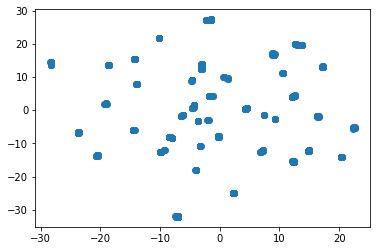

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(x=embedding['x'], y=embedding['y']);

# HDBSCAN

In [15]:
from hdbscan import HDBSCAN
    
hdbscan = HDBSCAN(min_cluster_size=50)

clustering = pd.Series(hdbscan.fit_predict(embedding))

clustering.sort_values().unique()

/home/gurus/miniconda3/envs/mlinproduction_env/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/gurus/miniconda3/envs/mlinproduction_env/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


array([-1,  0,  1,  2,  3,  4,  5,  6])

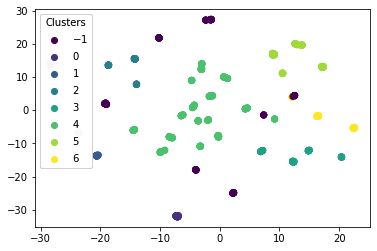

In [16]:
fig, ax = plt.subplots()

scatter = ax.scatter(x=embedding['x'], y=embedding['y'], c=clustering)
legend = ax.legend(*scatter.legend_elements(num=clustering.nunique()), title='Clusters', loc='upper left')
ax.add_artist(legend);


In [17]:
inverse = True

In [18]:
if inverse:
    sample_umap[columns_to_encode] = encoder.inverse_transform(sample_umap[columns_to_encode])
    inverse = False
    
sample_umap[clustering.values == 0]

,train_type,price,train_class,fare,duration
905052,AVE,100.4,Turista,Promo,2.5
1190171,AVE,100.4,Turista,Promo,2.5
759908,AVE,100.4,Turista,Promo,2.5
1210167,AVE,100.4,Turista,Promo,2.5
51087,AVE,100.4,Turista,Promo,2.5
434131,AVE,100.4,Turista,Promo,2.5
194268,AVE,100.4,Turista,Promo,2.5
851587,AVE,100.4,Turista,Promo,2.5
187270,AVE,100.4,Turista,Promo,2.5
343245,AVE,100.4,Turista,Promo,2.5
